In [405]:
import catppuccin
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matplotlib.style.use(["dark_background", catppuccin.PALETTE.mocha.identifier])
%matplotlib inline

In [406]:
df = pd.read_csv("./datasets/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [407]:
df.shape

(10000, 14)

In [408]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [410]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [411]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [412]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [413]:
df.select_dtypes(include=["object"])

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [414]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [415]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_country = ohe.fit_transform(df[["Geography"]])
country_df = pd.DataFrame(
    ohe_country,
    columns=ohe.get_feature_names_out(),
)

df = pd.concat([df.drop(["Geography"], axis=1), country_df], axis=1)
df = pd.concat([df.drop(["Exited"], axis=1), df["Exited"]], axis=1)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1
3,699,1,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,1


In [416]:
X = df.drop(["Exited"], axis=1)
y = df["Exited"].values

In [417]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalized_features = normalizer.fit_transform(X)

X = pd.DataFrame(normalized_features, columns=normalizer.get_feature_names_out())
X


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
1,0.516,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.304,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
3,0.698,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0
4,1.000,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0
9996,0.332,0.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0
9997,0.718,1.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0
9998,0.844,0.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0


In [418]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [419]:
train = X_train.copy()
train["Exited"] = y_train
major = train[train["Exited"] == 0]
minor = train[train["Exited"] == 1]

In [420]:
upsampled = minor.sample(len(major), replace=True, random_state=42)
train = pd.concat([major, upsampled]).sample(frac=1, random_state=42)

X_train = train.drop(columns=["Exited"])
y_train = train["Exited"].values

In [421]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    activation="relu",
    solver="adam",
    alpha=1e-05,
    hidden_layer_sizes=(100, 50, 25, 10, 5),
    random_state=42,
    early_stopping=True,
    max_iter=2000,
)
nn.fit(X_train, y_train)

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,1e-05
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True
,random_state,42


In [422]:
y_hat = nn.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

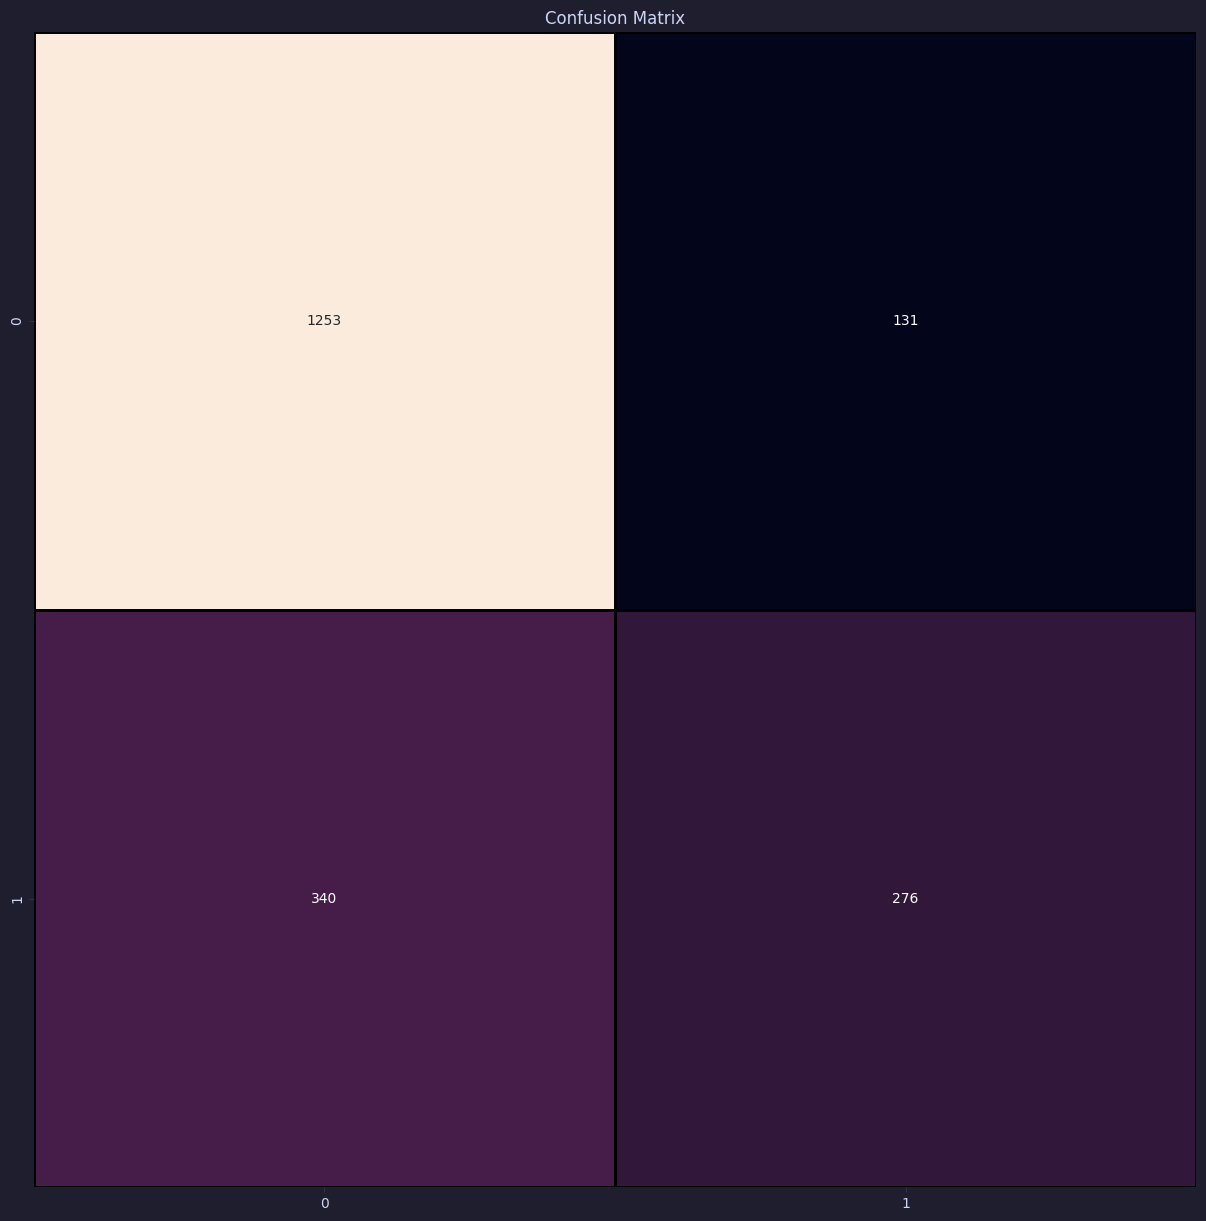

In [423]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat).T

plt.figure(figsize=(15, 15))
sns.heatmap(cm, cbar=False, annot=True, fmt="d", linewidths=0.75, linecolor="black")
plt.title("Confusion Matrix")

In [424]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.9053    0.7866    0.8418      1593
           1     0.4481    0.6781    0.5396       407

    accuracy                         0.7645      2000
   macro avg     0.6767    0.7323    0.6907      2000
weighted avg     0.8123    0.7645    0.7803      2000

